Load and Eplore the Dataset

In [1]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Salary_Data.csv")
df.head()


,Years of Experience,Salary
0,5.0,90000.0
1,3.0,65000.0
2,15.0,150000.0
3,7.0,60000.0
4,20.0,200000.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6701 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 104.9 KB


In [3]:
df.isnull().sum()

,0
Years of Experience,3
Salary,5


In [4]:
df.dropna(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6699 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6699 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 157.0 KB


Feuture scalling

In [7]:
from sklearn.preprocessing import StandardScaler
x=df[['Years of Experience']]
y=df[['Salary']].values
sc_x=StandardScaler()
sc_y=StandardScaler()
x_scaled=sc_x.fit_transform(x)
y_scaled=sc_y.fit_transform(y)

Flatter y for SVR

In [8]:
y_scaled

array([[-0.47983873],
       [-0.95348286],
       [ 0.65690718],
       ...,
       [-1.14294051],
       [ 0.46744953],
       [-1.52185581]])

In [10]:
y_scaled

array([[-0.47983873],
       [-0.95348286],
       [ 0.65690718],
       ...,
       [-1.14294051],
       [ 0.46744953],
       [-1.52185581]])

train SVR model(RBF kernel)

In [13]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf',epsilon=0.1)
svr.fit(x_scaled,y_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

prediction and inverse scaling

In [15]:
y_pred_scaled=svr.predict(x_scaled)
y_pred=sc_y.inverse_transform(y_pred_scaled.reshape(-1,1))

In [16]:
y_pred_scaled

array([-0.44136901, -0.94824676,  1.21996727, ..., -0.69121786,
        1.10320547, -1.42223769])

In [17]:
y_pred

array([[ 92030.51822044],
       [ 65276.37287393],
       [179719.57488156],
       ...,
       [ 78842.93496023],
       [173556.62504107],
       [ 40258.06831989]])

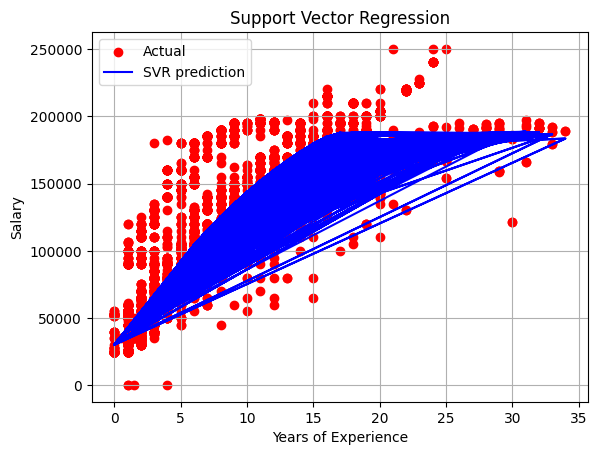

In [19]:
import matplotlib.pyplot as plt
plt.scatter(x,y,color='red',label='Actual')
plt.plot(x,y_pred,color='blue',label='SVR prediction')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Support Vector Regression')
plt.grid(True)
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


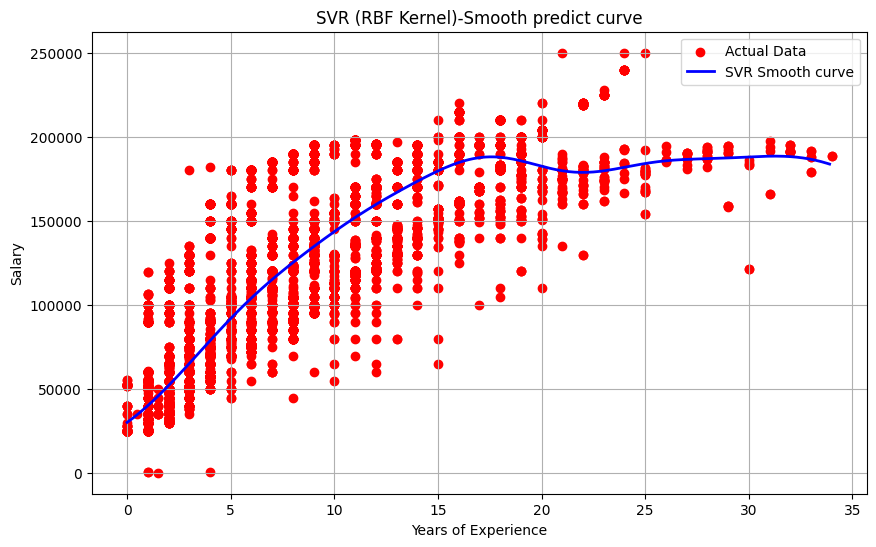

In [22]:
import numpy as np
import matplotlib.pyplot as plt
#create a fine grid between min and max years experience
x_flat = x.values.flatten()
x_grid=np.arange(min(x_flat),max(x_flat),0.1)
x_grid=x_grid.reshape(-1,1)
#scale x_grid just like training data
x_grid_scaled=sc_x.transform(x_grid)
#predict on the grid and inverse the trasform the result
y_grid_scaled=svr.predict(x_grid_scaled)
y_grid=sc_y.inverse_transform(y_grid_scaled.reshape(-1,1))
#plot
plt.figure(figsize=(10,6))
plt.scatter(x,y,color='red',label='Actual Data')
plt.plot(x_grid,y_grid,color='blue',label='SVR Smooth curve',linewidth=2)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('SVR (RBF Kernel)-Smooth predict curve')
plt.grid(True)
plt.legend()
plt.show()

EVALUATE model performance

In [24]:
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
mse=mean_squared_error(y,y_pred)
r2=r2_score(y,y_pred)
print("Mean Squared Error:",mse)
print("Root Mean Squared Error:",np.sqrt(mse))
print("R2 Score:",r2)

Mean Squared Error: 766339401.3394145
Root Mean Squared Error: 27682.83586158424
R2 Score: 0.7249285879306625


Compare kernels using code

In [25]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
#1.load and scale data
x=df[['Years of Experience']]
y=df[['Salary']].values
sc_x=StandardScaler()
sc_y=StandardScaler()
x_scaled=sc_x.fit_transform(x)
y_scaled=sc_y.fit_transform(y)

Kernel: LINEAR | R-square Score: 0.6326


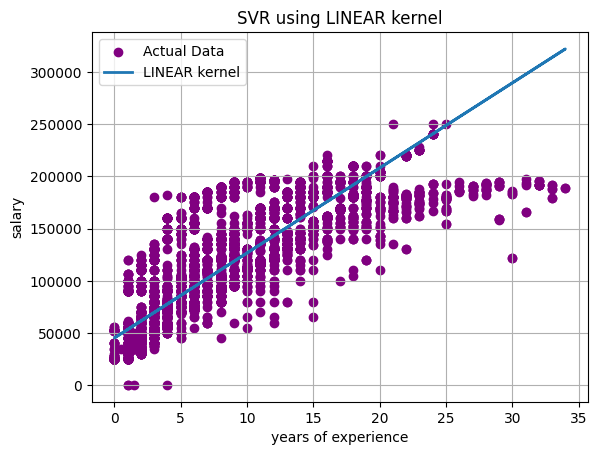

Kernel: POLY | R-square Score: 0.0578


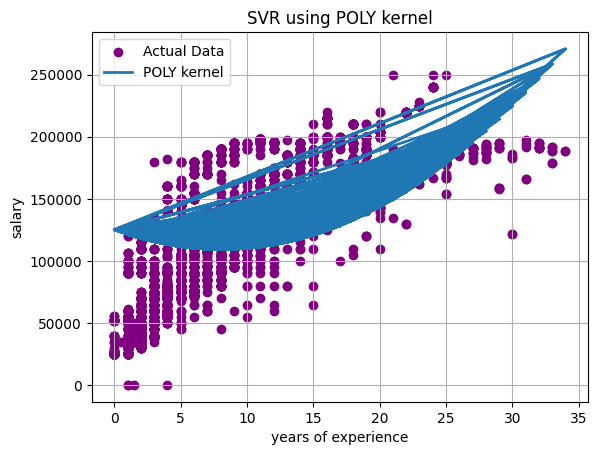

Kernel: RBF | R-square Score: 0.7249


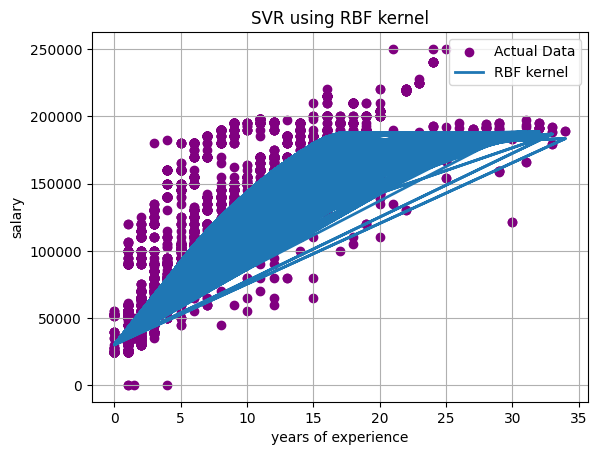

In [31]:
#2.Defines kernels
kernels=['linear','poly','rbf']
#3.Train ana evaluate each kernel
for kernel in kernels:
  if kernel=='poly':
    model=SVR(kernel=kernel,degree=2)
  else:
    model=SVR(kernel=kernel)
  model.fit(x_scaled,y_scaled)
  #predict for training data
  y_pred_scaled=model.predict(x_scaled)
  y_pred=sc_y.inverse_transform(y_pred_scaled.reshape(-1,1))
  #Evaluation
  score=r2_score(y,y_pred)
  print(f"Kernel: {kernel.upper()} | R-square Score: {score:.4f}")
  #plot(optional)
  plt.scatter(x,y,color='gray',label='Actual Data')
  plt.plot(x,y_pred,label=f'{kernel.upper()} kernel',linewidth=2)
  plt.title(f'SVR using {kernel.upper()} kernel')
  plt.xlabel("years of experience")
  plt.ylabel("salary")
  plt.grid(True)
  plt.legend()
  plt.show()

Try Different c and epsilon values

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


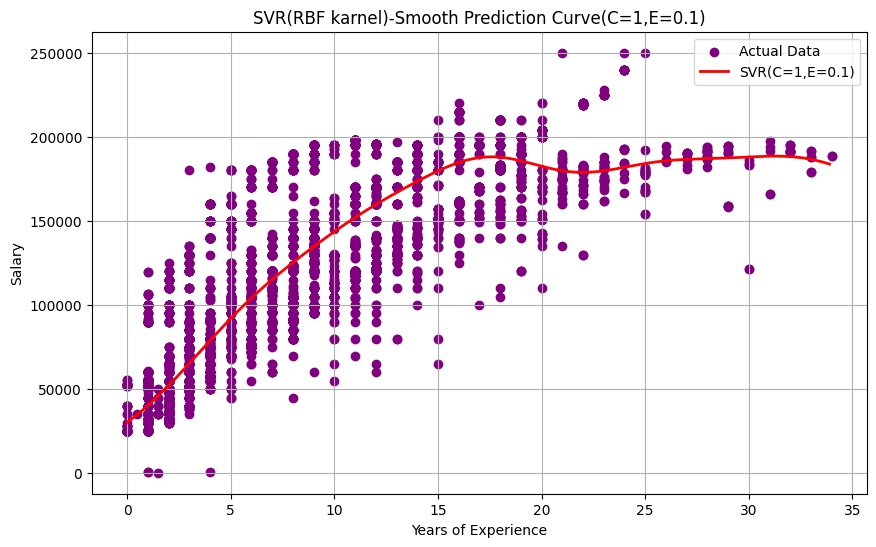

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


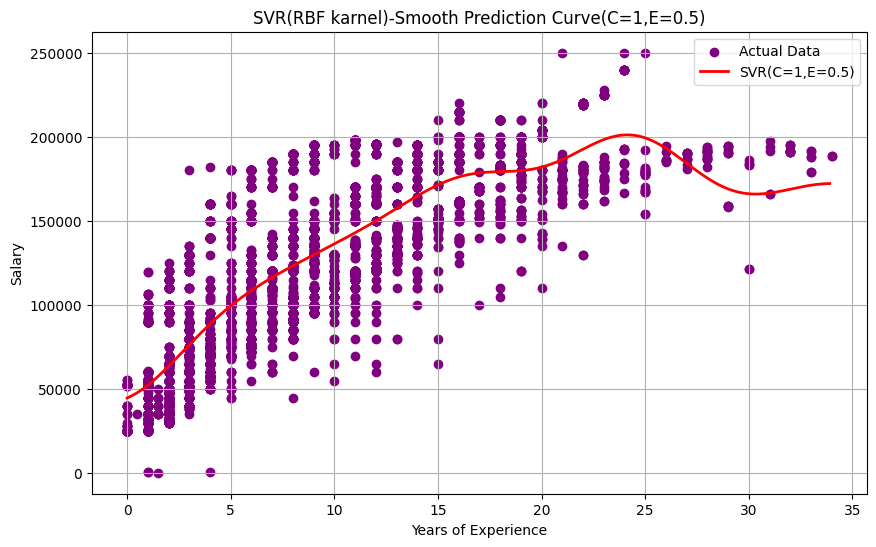

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


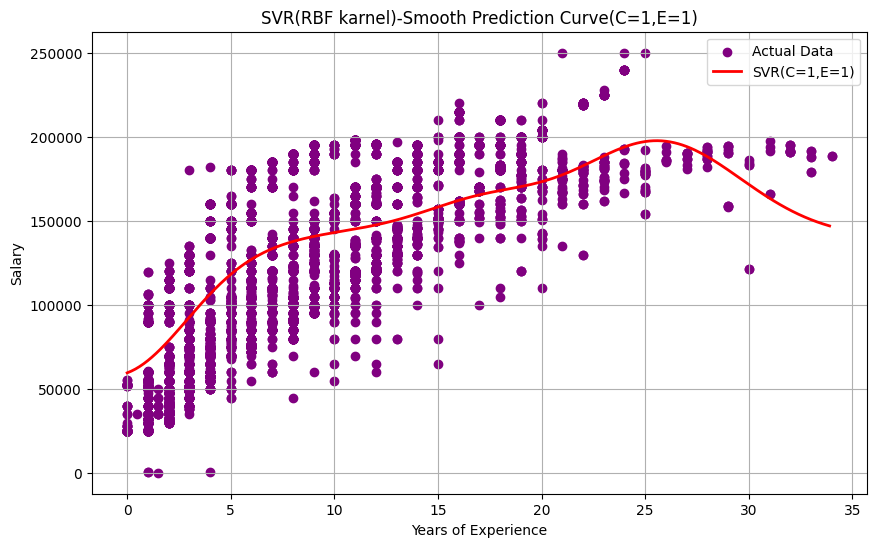

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


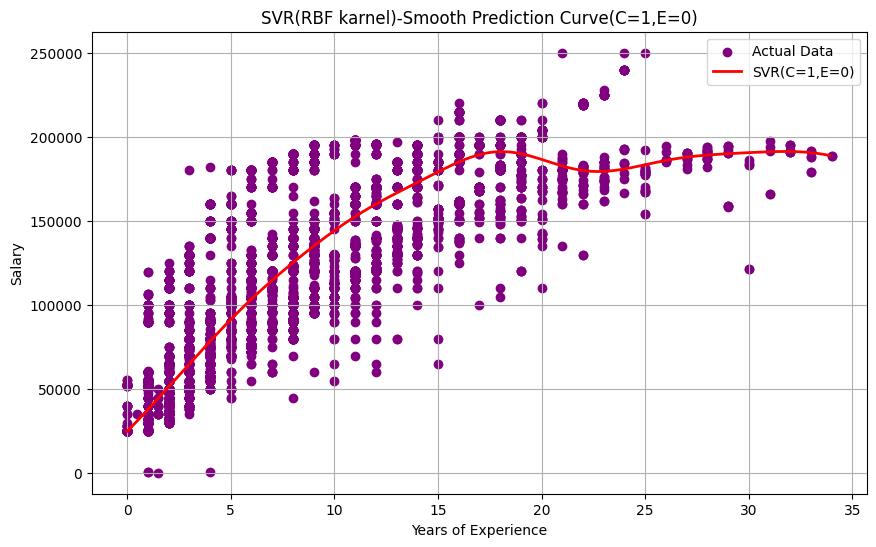

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


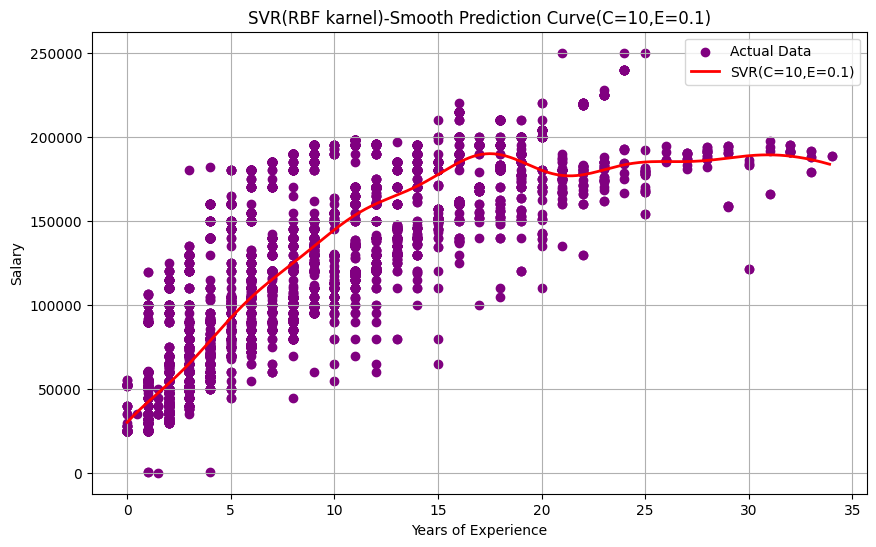

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


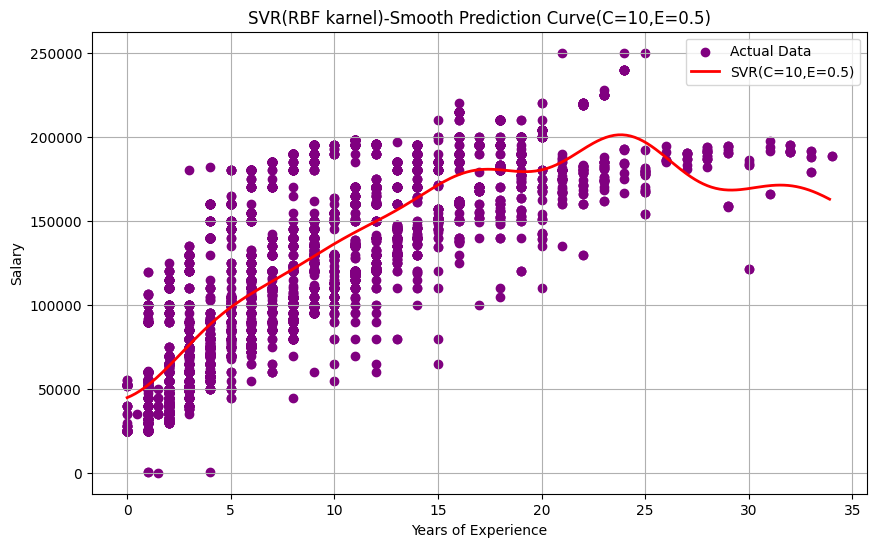

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


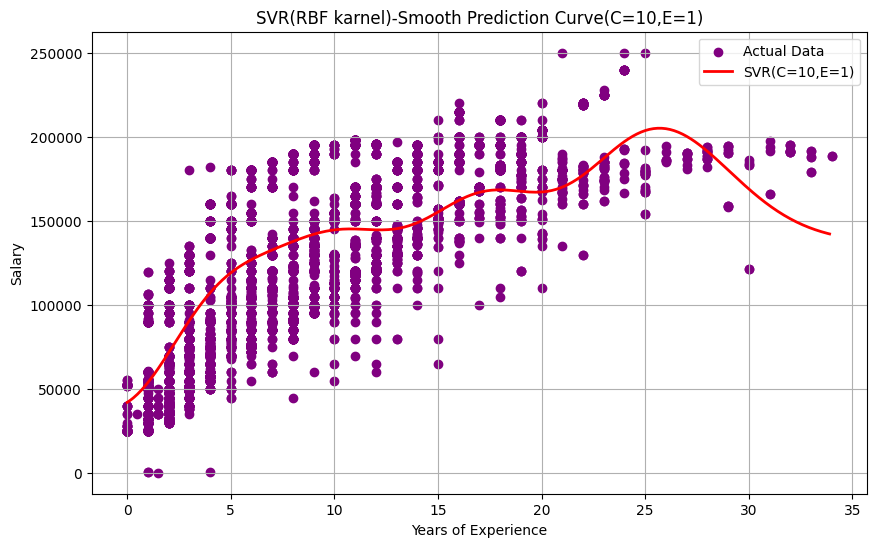

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


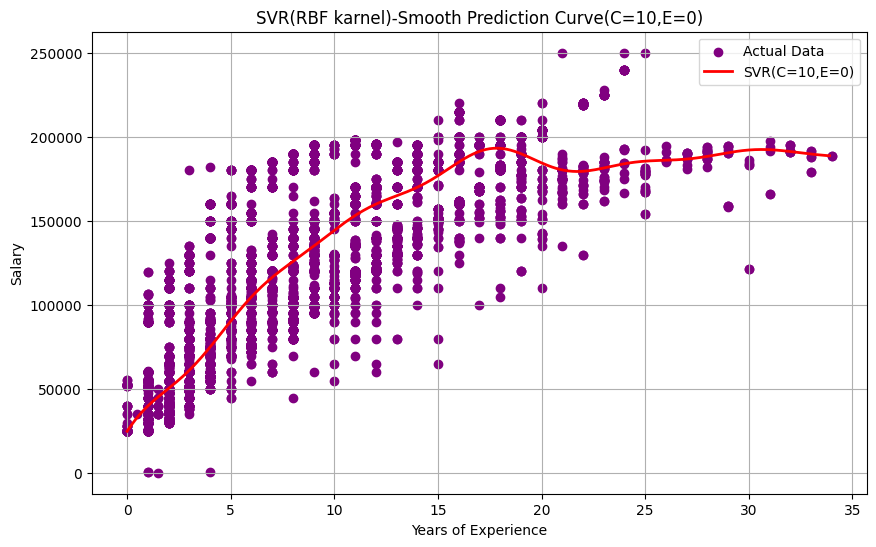

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


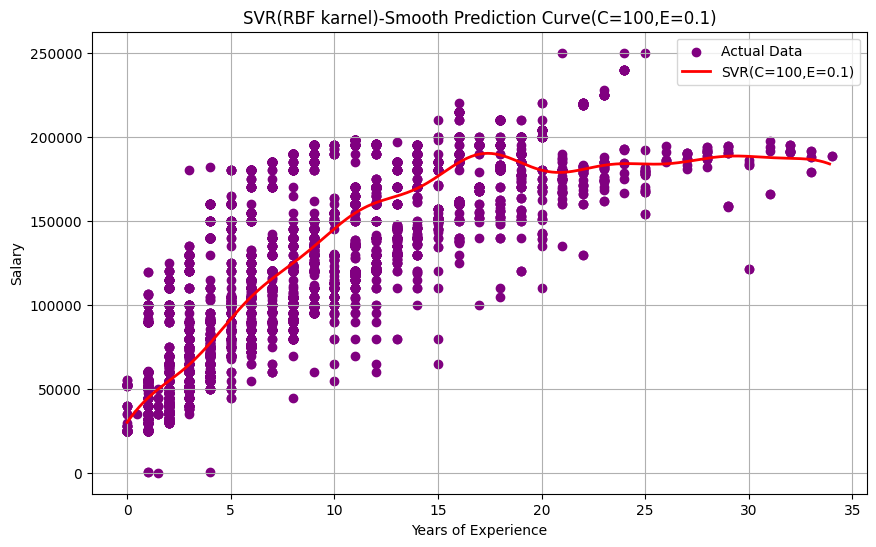

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


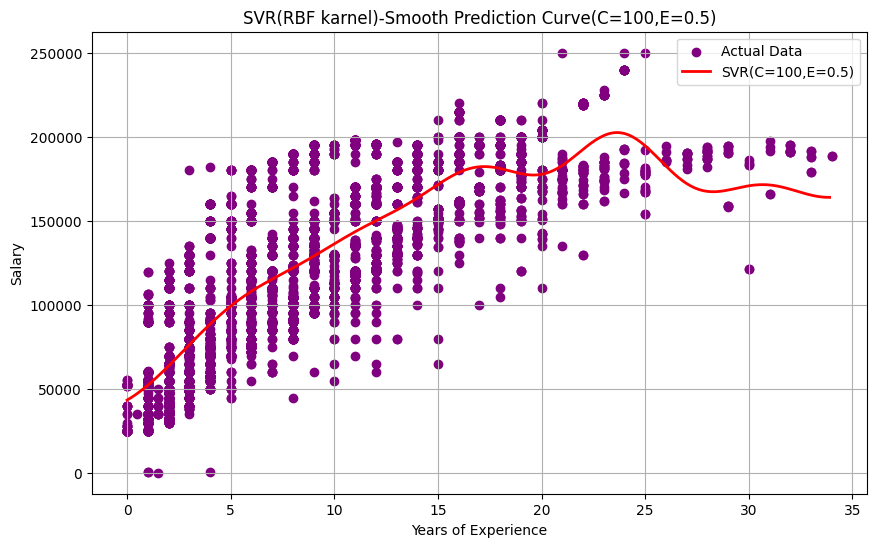

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


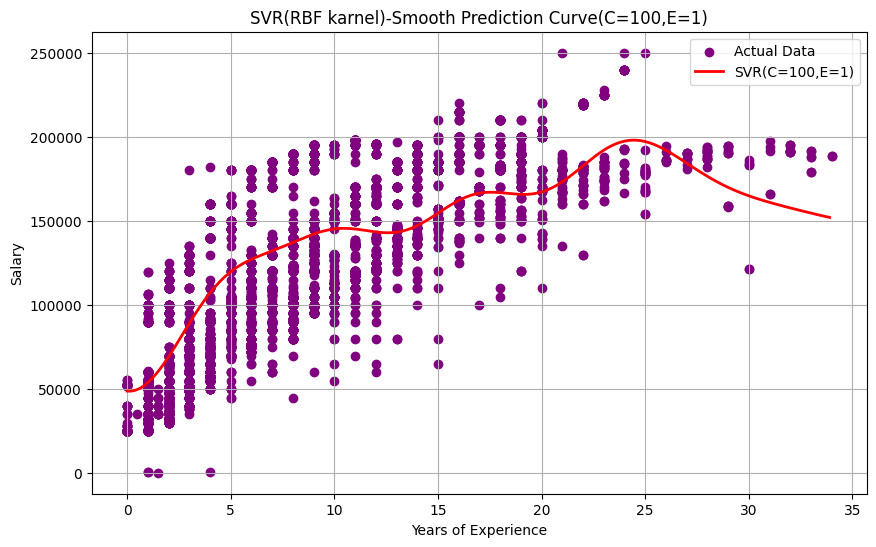

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


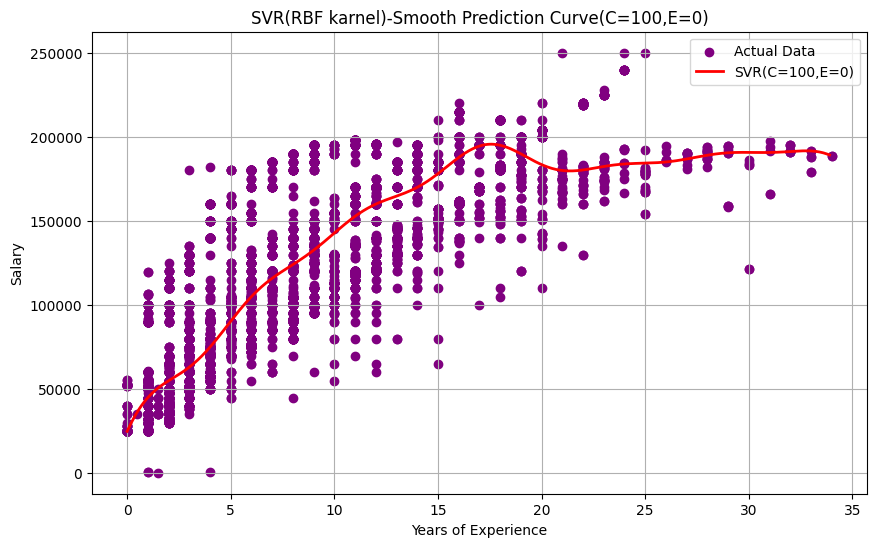

In [33]:
c_values=[1,10,100]
epsilon_values=[0.1,0.5,1,0]
x_flat = x.values.flatten()
x_grid=np.arange(min(x_flat),max(x_flat),0.1).reshape(-1,1)
x_grid_scaled=sc_x.transform(x_grid)
for c_value in c_values:
  for eps in epsilon_values:
    model=SVR(kernel='rbf',C=c_value,epsilon=eps)
    model.fit(x_scaled,y_scaled.ravel())
    y_grid_scaled=model.predict(x_grid_scaled)
    y_grid=sc_y.inverse_transform(y_grid_scaled.reshape(-1,1))
    plt.figure(figsize=(10,6))
    plt.scatter(x,y,color='purple',label='Actual Data')
    plt.plot(x_grid,y_grid,color='red',label=f'SVR(C={c_value},E={eps})',linewidth=2)
    plt.title(f'SVR(RBF karnel)-Smooth Prediction Curve(C={c_value},E={eps})')
    plt.xlabel('Years of Experience')
    plt.ylabel('Salary')
    plt.grid(True)
    plt.legend()
    plt.show()